We will investigate the relationship between GDP and Life Expectancy for countries in the dataset

We will address the following questions:
1) How does GDP change over time (for each country)
2) How does life expactancy change over time (for each country)
3) Does a change in GDP correlate with a change in life expectancy


- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

In [340]:
# Load the Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("all_data.csv")
print(df.info()) 
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [344]:
# Investigate how many countries are in the dataset and the years the dataset covers
print(df.Country.unique())
print(df.Year.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [345]:
# There are 4 columns, Country, Year, Life Expectancy, and GDP
# No null values
df["LEABY"] = df["Life expectancy at birth (years)"]
df.Country = df.Country.str.replace('United States of America', 'USA')
df.head()


,Country,Year,Life expectancy at birth (years),GDP,LEABY
0,Chile,2000,77.3,7.786093e+10,77.3
1,Chile,2001,77.3,7.097992e+10,77.3
2,Chile,2002,77.8,6.973681e+10,77.8
3,Chile,2003,77.9,7.564346e+10,77.9
4,Chile,2004,78.0,9.921039e+10,78.0


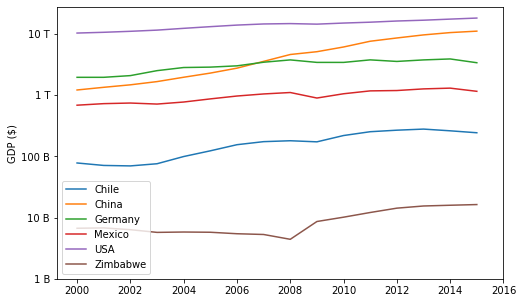

Chile's GDP grew by $164.7 billion dollars
China's GDP grew by $9.9 trillion dollars
Germany's GDP grew by $1.4 trillion dollars
Mexico's GDP grew by $468.6 billion dollars
USA's GDP grew by $7.8 trillion dollars
Zimbabwe's GDP grew by $9.6 billion dollars


<Figure size 432x288 with 0 Axes>

In [347]:
# Plotting each country's GDP over time
plt.figure(figsize=(8,5))
ax = sns.lineplot(data = df, x = "Year", y = 'GDP', hue = "Country")
ax.set_xticks(range(df.Year.min(),df.Year.max()+2, 2))
plt.xlabel('')
plt.ylabel("GDP ($)")
plt.yscale('log', base = 10)

#remove smaller x ticks
ax.yaxis.set_minor_locator(NullLocator())

# Define tick locations and labels
tick_locations = [1e9, 1e10, 1e11, 1e12, 1e13]
tick_labels = ['1 B', '10 B', '100 B', '1 T', '10 T']
ax.set_yticks(tick_locations)
ax.set_yticklabels(tick_labels)

plt.legend()
plt.show()
plt.clf()

# calculate GDP growth over these 16 years
for country in df.Country.unique():
    gdp_2015 = df.loc[(df.Country == country) & (df.Year == 2015), "GDP"].values[0]
    gdp_2000 = df.loc[(df.Country == country) & (df.Year == 2000), "GDP"].values[0]
    gdp_growth = gdp_2015 - gdp_2000
    if gdp_growth > 10**12:
        gdp_growth = round(gdp_growth/10**12,1)
        print(country + "'s GDP grew by $" + str(gdp_growth) + " trillion dollars")
    else:
        gdp_growth = round(gdp_growth/10**9,1)
        print(country + "'s GDP grew by $" + str(gdp_growth) + " billion dollars")


Key Results:
1) All 6 countries experienced an increase in GDP 
2) All countries except for China experienced a drop in GDP around 2008
3) China had the greatest increase in GDP over these 16 years
4) The USA has the greatest GDP while Zimbabwe has the lowest
5) Zimbabwe experienced a drop in GDP for 7 straight years (2001 - 2008)

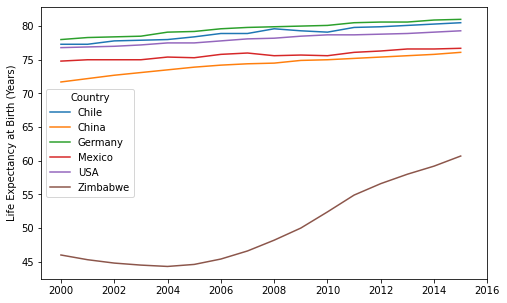

Chile's life expactancy increased by 3.2 years
China's life expactancy increased by 4.4 years
Germany's life expactancy increased by 3.0 years
Mexico's life expactancy increased by 1.9 years
USA's life expactancy increased by 2.5 years
Zimbabwe's life expactancy increased by 14.7 years


<Figure size 432x288 with 0 Axes>

In [317]:
# Plotting each country's LEABY over time
plt.figure(figsize=(8,5))
ax = sns.lineplot(data = df, x = "Year", y = 'LEABY', hue = "Country")
ax.set_xticks(range(df.Year.min(),df.Year.max()+2, 2))
plt.xlabel('')
plt.ylabel("Life Expectancy at Birth (Years)")
plt.show()
plt.clf()

for country in df.Country.unique():
    leaby_2015 = df.loc[(df.Country == country) & (df.Year == 2015), "LEABY"].values[0]
    leaby_2000 = df.loc[(df.Country == country) & (df.Year == 2000), "LEABY"].values[0]
    leaby_change = round(leaby_2015 - leaby_2000,1)
    print(country + "'s life expactancy increased by " + str(leaby_change) + " years")

Key Results:
1) All 6 countries experienced an increase in LEABY
2) Mexico had the smallest change of +1.9 years
3) Zimbabwe had the largest change of +14.7 years
4) Germany has the highest LEABY while Zimbabwe has the lowest
5) Only Chile and Mexico experienced a drop in LEABY around 2008 (corresponding to a drop in their GDP)



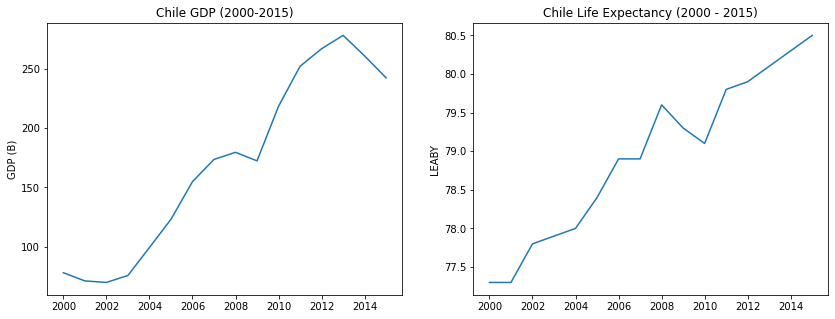

Chile GDP changed by 211%
Chile Life expectancy changed by 4.14%


<Figure size 432x288 with 0 Axes>

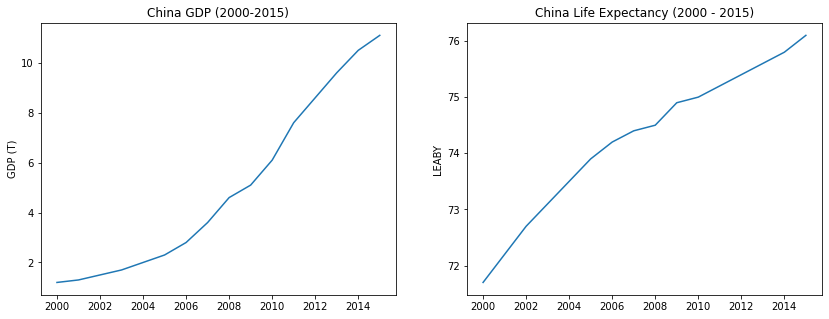

China GDP changed by 813%
China Life expectancy changed by 6.14%


<Figure size 432x288 with 0 Axes>

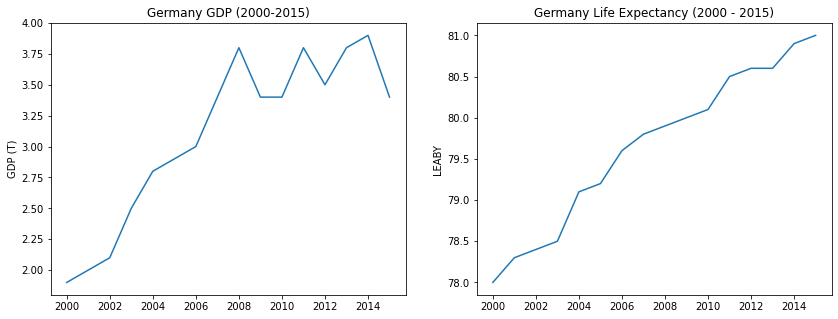

Germany GDP changed by 73%
Germany Life expectancy changed by 3.85%


<Figure size 432x288 with 0 Axes>

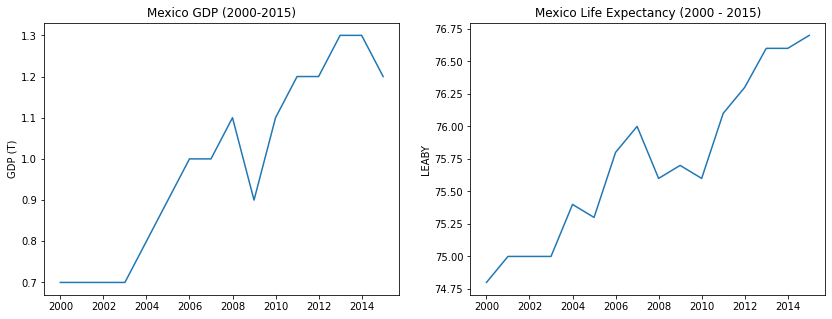

Mexico GDP changed by 69%
Mexico Life expectancy changed by 2.54%


<Figure size 432x288 with 0 Axes>

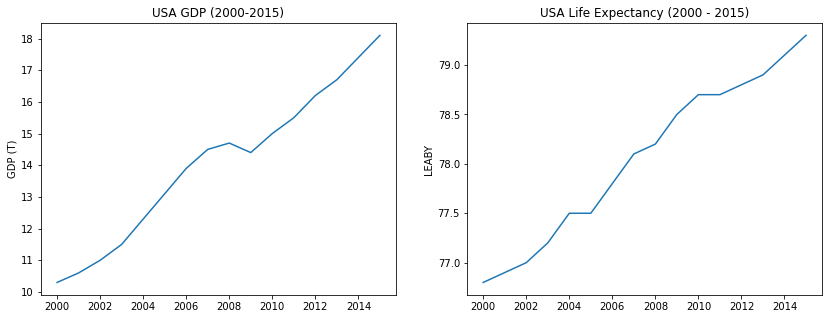

USA GDP changed by 76%
USA Life expectancy changed by 3.26%


<Figure size 432x288 with 0 Axes>

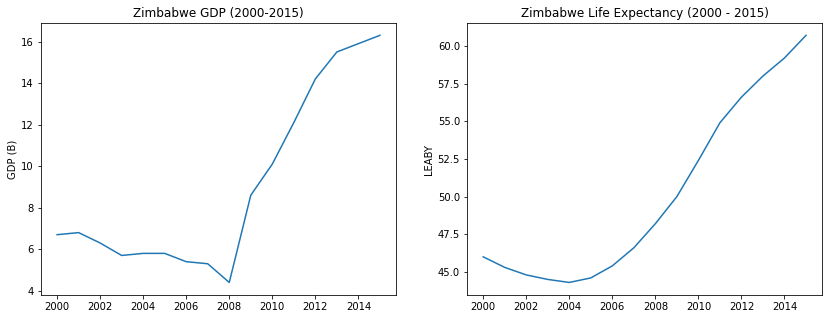

Zimbabwe GDP changed by 144%
Zimbabwe Life expectancy changed by 31.96%


<Figure size 432x288 with 0 Axes>

In [329]:

for country in df.Country.unique():
    plt.figure(figsize = (14, 5))
    if df.loc[df.Country == country, "GDP"].values[0] > 10**11:
        df["GDP (T)"] = round(df.GDP/10**12,1)
        plt.subplot(1,2,1)
        sns.lineplot(data = df[df.Country == country], x = 'Year', y = 'GDP (T)')
        plt.xlabel('')
        plt.title("%s GDP (2000-2015)" %country)
    else:
        df["GDP (B)"] = round(df.GDP/10**9,1)
        plt.subplot(1,2,1)
        sns.lineplot(data = df[df.Country == country], x = 'Year', y = 'GDP (B)')
        plt.xlabel('')
        plt.title("%s GDP (2000-2015)" %country)
    
    plt.subplot(1,2,2)
    sns.lineplot(data = df[df.Country == country], x = "Year", y = "LEABY")
    plt.xlabel("")
    plt.title("%s Life Expectancy (2000 - 2015)" %country)
    plt.show()
    plt.clf()

    # calculate change in GDP
    gdp_2015 = df.loc[(df.Country == country) & (df.Year == 2015), "GDP"].values[0]
    gdp_2000 = df.loc[(df.Country == country) & (df.Year == 2000), "GDP"].values[0]
    gdp_change = str(round(100*(gdp_2015 - gdp_2000)/gdp_2000)) +"%"
    print("%s GDP changed by "%country + gdp_change)

    # calculate change in LEABY
    leaby_2015 = df.loc[(df.Country == country) & (df.Year == 2015), "LEABY"].values[0]
    leaby_2000 = df.loc[(df.Country == country) & (df.Year == 2000), "LEABY"].values[0]
    leaby_change = str(round(100*(leaby_2015 - leaby_2000)/leaby_2000,2)) +"%"
    print("%s Life expectancy changed by "%country + leaby_change)


Measure GDP vs LEABY

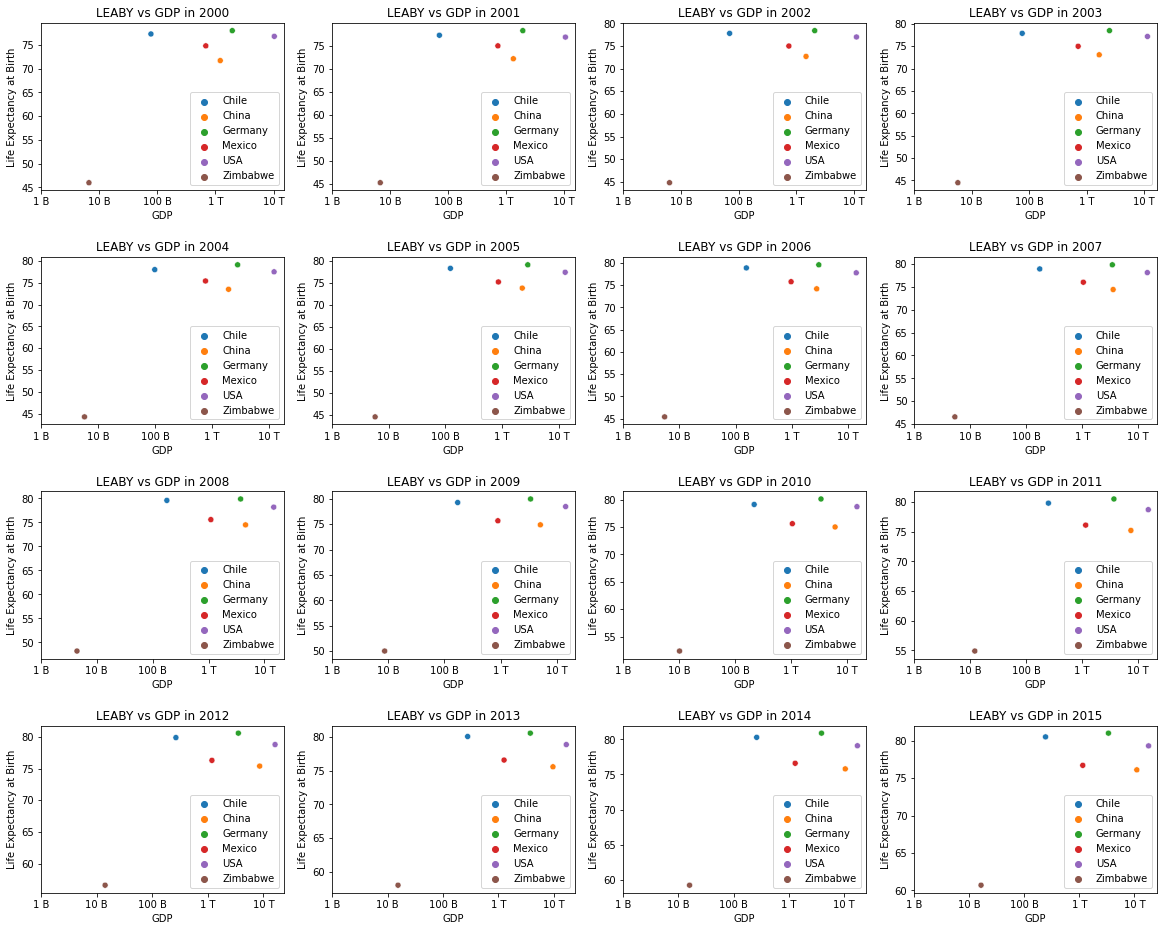

<Figure size 432x288 with 0 Axes>

In [330]:
from matplotlib.ticker import NullLocator
# Get unique years in the dataframe
years = sorted(df.Year.unique())

# Create a 4x4 subplot figure
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 16))

# Define tick locations and labels
tick_locations = [1e9, 1e10, 1e11, 1e12, 1e13]
tick_labels = ['1 B', '10 B', '100 B', '1 T', '10 T']

# Loop through each year and plot the scatterplot on the appropriate subplot
for i, year in enumerate(years):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    sns.scatterplot(data=df[df.Year == year], x='GDP', y='LEABY', hue='Country', ax=ax)
    ax.set_ylabel("Life Expectancy at Birth")
    ax.set_xlabel("GDP")
    ax.set_xscale("log", base=10)
    ax.set_xticks(tick_locations)
    ax.set_xticklabels(tick_labels)
    #remove smaller x ticks
    ax.xaxis.set_minor_locator(NullLocator())
    ax.set_title("LEABY vs GDP in " + str(year))
    ax.legend(loc='lower right')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.2)

# Show the plot
plt.show()
plt.clf()

    Country  Life expectancy at birth (years)           GDP     LEABY
0     Chile                          78.94375  1.697888e+11  78.94375
1     China                          74.26250  4.957714e+12  74.26250
2   Germany                          79.65625  3.094776e+12  79.65625
3    Mexico                          75.71875  9.766506e+11  75.71875
4       USA                          78.06250  1.407500e+13  78.06250
5  Zimbabwe                          50.09375  9.062580e+09  50.09375


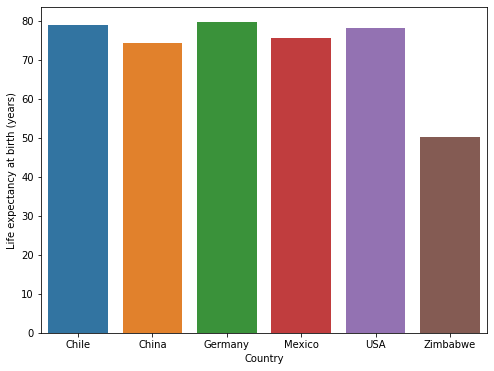

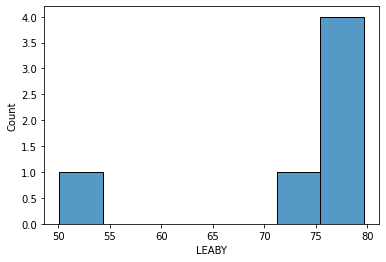

In [369]:
# plot average life expectancy by country
df_mean = df.drop("Year", axis = 1).groupby("Country").mean().reset_index()
print(df_mean)
plt.figure(figsize=(8,6))
sns.barplot(data = df_mean, x="Country", y="LEABY")
plt.ylabel("Life expectancy at birth (years)")
plt.show()
plt.clf()

# plot distribution of life expectancy by country
sns.histplot(data = df_mean, x = 'LEABY')
plt.show()

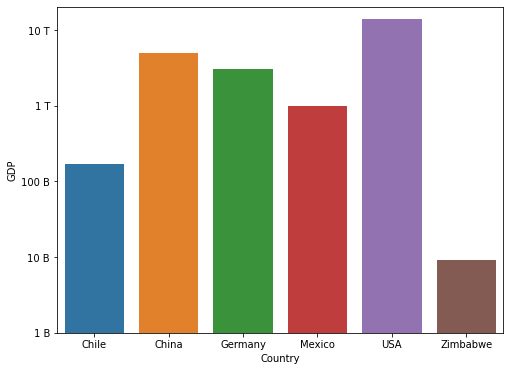

<Figure size 432x288 with 0 Axes>

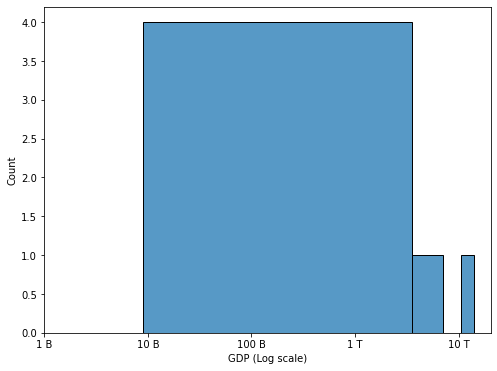

In [376]:
# plot average gdp by country
plt.figure(figsize=(8,6))
ax = sns.barplot(data = df_mean, x="Country", y="GDP")
ax.set_yscale("log", base=10)
# Define tick locations and labels
tick_locations = [1e9, 1e10, 1e11, 1e12, 1e13]
tick_labels = ['1 B', '10 B', '100 B', '1 T', '10 T']
ax.set_yticks(tick_locations)
ax.set_yticklabels(tick_labels)
#remove smaller y ticks
ax.yaxis.set_minor_locator(NullLocator())
plt.show()
plt.clf()

# plot distribution of gdp by country
plt.figure(figsize=(8,6))
bx = sns.histplot(data = df_mean, x = 'GDP')
bx.set_xlabel("GDP (Log scale)")
bx.set_xscale("log", base = 10)
bx.set_xticks(tick_locations)
bx.set_xticklabels(tick_labels)
#remove smaller y ticks
bx.xaxis.set_minor_locator(NullLocator())
plt.show()

Conclusions

In this project we were able to address our initial questions:

1) How does GDP change over time (for each country)?
    + Each Country experienced an increase in GDP, with China having the greatest % increase.
    + All countries, except for China, experienced a drop in GDP around 2008
    + China had the greatest increase in GDP over these 16 years (811%, or $9.85 trillion)
    + The USA has the greatest GDP while Zimbabwe has the lowest
    + Zimbabwe experienced a drop in GDP for 7 straight years (2001 - 2008)  
    <p>
2) How does life expactancy change over time (for each country)?
    - All 6 countries experienced an increase in LEABY, with Zimbabwe experiencing the largest change of +14.7 years and Mexico experiencing the lowet change of +1.9 years.
    - For each year, Germany had the largest life expectancy at birth, while Zimbabwe had the lowest.   
    <p>
3) Does a change in GDP correlate with a change in life expectancy?
    - Overall there is a positive correlation between GDP and life expectancy for countries in this dataset.
    - Interestingly, while most countries experienced a drop in their GDP in 2008, only Chile and Mexico experienced a drop in LEABY.  
    
    
Other noteworthy findings:
- The average life expectancy was in the mid to high 70s for all countries except for Zimbabwe, which was around 50.